In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import pickle 

In [3]:
df = pd.read_csv('titanic_raw.csv')

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [6]:
df.corr()['survived']

C:\Users\khoob\AppData\Local\Temp\ipykernel_22196\1433078523.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['survived']


pclass     -0.312469
survived    1.000000
age        -0.055513
sibsp      -0.027825
parch       0.082660
fare        0.244265
body             NaN
Name: survived, dtype: float64

In [7]:
df.shape

(1309, 14)

In [8]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [9]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [10]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [11]:
df = df.loc[:, ('pclass', 'age', 'sex', 'survived', 'embarked')]

In [12]:
df.sample(5)

,pclass,age,sex,survived,embarked
151,1,27.0,male,1,C
619,3,18.0,male,0,S
165,1,38.0,male,1,S
309,1,31.0,female,1,S
474,2,31.0,male,0,S


In [13]:
df.isna().sum()

pclass        0
age         263
sex           0
survived      0
embarked      2
dtype: int64

In [14]:
df = df.loc[df.embarked.notna(), :]

In [15]:
df.shape

(1307, 5)

In [16]:
df.isna().sum()

pclass        0
age         263
sex           0
survived      0
embarked      0
dtype: int64

In [17]:
df_X = df.drop('survived', axis = 'columns')
df_Y = df.survived

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, stratify=df_Y)

In [19]:
num_pipeline = Pipeline([
    ('imp', SimpleImputer(strategy = 'median')),
    ('norm', StandardScaler()),
])

In [20]:
col_transformer = ColumnTransformer([
    ('num', num_pipeline, ['pclass', 'age']), 
    ('cat', OneHotEncoder(), ['sex', 'embarked'])
])

In [21]:
pipeline = Pipeline([
    ('trans', col_transformer),
    ('cls', LogisticRegression()) 
])

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('norm',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'embarked'])])),
                ('cls', LogisticRegression())])

In [23]:
scores = cross_val_score(pipeline, X_train, y_train, scoring = 'accuracy', cv=5)

In [24]:
scores

array([0.79781421, 0.84699454, 0.7704918 , 0.69398907, 0.78021978])

In [25]:
scores.mean()

0.7779018795412238

In [26]:
y_pred = pipeline.predict(X_test)

In [27]:
accuracy_score(y_pred, y_test)

0.7989821882951654

In [28]:
cm = confusion_matrix(y_test, y_pred, labels = pipeline.classes_)
cm

array([[213,  30],
       [ 49, 101]], dtype=int64)

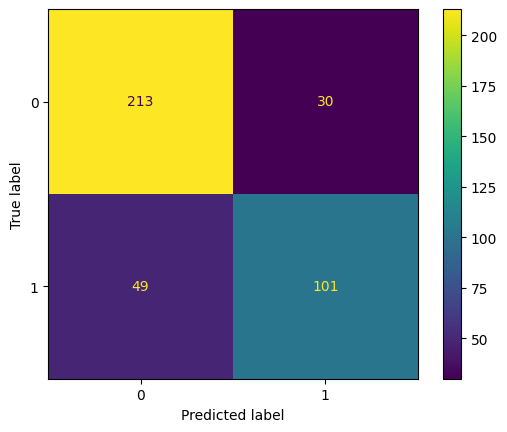

In [29]:
plot = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = pipeline.classes_)
plot.plot()
plt.show()

In [30]:
pickle.dump(pipeline, open('pipeline.pk1', 'wb'))

In [31]:
pipeline2 = pickle.load(open('pipeline.pk1', 'rb'))